# Image and feature analysis
Let's start by loading the libraries we'll need:

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

## Extract Images

Included in these workshop materials is a compressed file ("data.tar.gz") containg the images that we'll be classifying today. Once you extract this file, you should have a directory called "data" which contains the following directories:

Directory            |  Contents
:-------------------------:|:-------------------------:
I | Contains rectangle tag images
O    | Contains circle tag images
Q      | Contains blank tag images

Feel free to have a look through these directories, and we'll show you how to load these images into Python using OpenCV next.

## Reading Images

We're now going to be using OpenCV's "imread" command to load one of the images from each type of tag into Python and then use Matplotlib to plot the images:

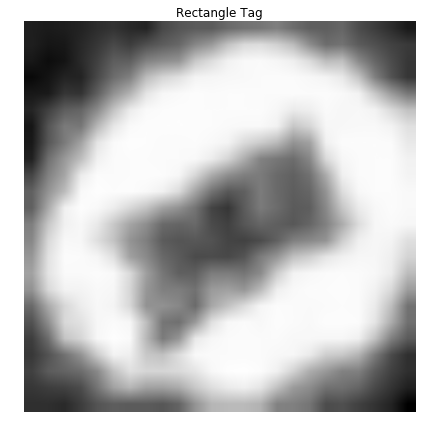

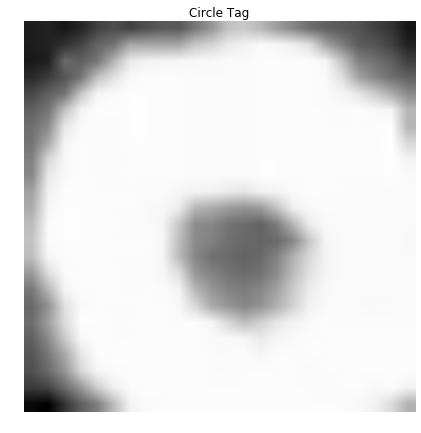

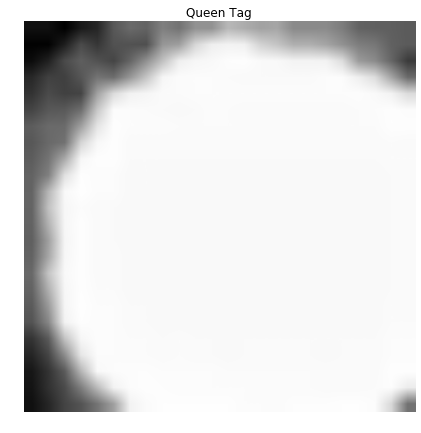

In [2]:
rect_image =    cv2.imread('data/I/27.png', cv2.IMREAD_GRAYSCALE)
circle_image =  cv2.imread('data/O/11527.png', cv2.IMREAD_GRAYSCALE)
queen_image =   cv2.imread('data/Q/18027.png', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize = (10, 7))
plt.title('Rectangle Tag')
plt.axis('off')
plt.imshow(rect_image,  cmap = cm.Greys_r)
plt.figure(figsize = (10, 7))
plt.title('Circle Tag')
plt.axis('off')
plt.imshow(circle_image,  cmap = cm.Greys_r)

plt.figure(figsize = (10, 7))
plt.title('Queen Tag')
plt.axis('off')
plt.imshow(queen_image,  cmap = cm.Greys_r)

## Image Properties

One of the really useful things about using OpenCV to manipulate images in Python is that all images are treated as NumPy matrices. This means we can use NumPy's functions to manipulate and understand the data we're working with. To demonstrate this, we'll use use NumPy's "shape" and "dtype" commands to take a closer look at the rectangular tag image we just read in:

In [3]:
print (rect_image.shape)
print (rect_image.dtype)

(24, 24)
uint8


This tells us that this image is 24x24 pixels in size, and that the datatype of the values it stores are unsigned 8 bit integers. While the explanation of this datatype isn't especially relevant to the lesson, the main point is that it is extremely important to double check the size and structure of your data. Let's do the same thing for the circular tag image too:

In [4]:
print (circle_image.shape)
print (circle_image.dtype)

(24, 24)
uint8


This holds the same values, which is good. When you're working with your own datasets in the future, it would be highly beneficial to write your own little program to check the values and structure of your data to ensure that subtle bugs don't creep in to your analysis.

## Feature Engineering

When people think of machine learning, the first thing that comes to mind tends to be the fancy algorithms that will train the computer to solve your problem. Of course this is important, but the reality of the matter is that the way you process the data you'll eventually feed into the machine learning algorithm is often the thing you'll spend the most time doing and will have the biggest effect on the accuracy of your results.

Now, when most people think of features in data, they think that this is what it is:

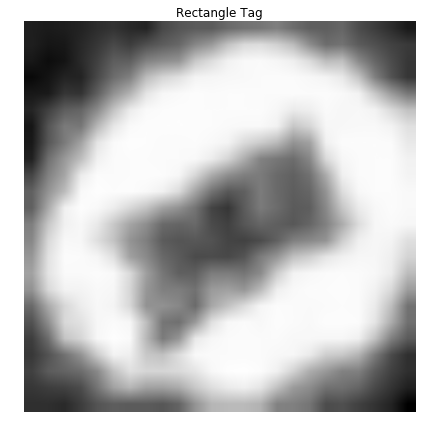

In [5]:
plt.figure(figsize = (10, 7))
plt.title('Rectangle Tag')
plt.axis('off')
plt.imshow(rect_image,  cmap = cm.Greys_r)

In fact this is not actualy the case. In the case of this dataset, the features are actually the pixel values that make up the images - those are the values we'll be training the machine learning algorithm with:

In [ ]:
print(rect_image)

So what can we do to manipulate the features in out dataset to improve our results? We'll explore three methods to acheive this:

1. Image smoothing
2. Modifying brightness
3. Modifying contrast

Techniques like image smoothing can be useful when improving the features you train the machine learning algorithm on as you can eliminate some of the potential noise in the image that could confuse the program.

## Smoothing

Image smoothing is another name for blurring the image. It involves passing a rectangular box (called a kernel) over the image and modifying pixels in the image based on the surrounding values.

As part of this exercise, we'll explore 3 different smoothing techniques:

Smoothing Method            |  Explanation
:-------------------------:|:-------------------------:
Mean | Replaces pixel with the mean value of the surrounding pixels
Median    | Replaces pixel with the median value of the surrounding pixels
Gaussian      | Replaces pixel by placing different weightings on surrrounding pixels according to the gaussian distribution

In [ ]:
mean_smoothed = cv2.blur(rect_image, (5, 5))
median_smoothed = cv2.medianBlur(rect_image, 5)
gaussian_smoothed = cv2.GaussianBlur(rect_image, (5, 5), 0)

Feel free to have a play with the different parameters for these smoothing operations. We'll now write some code to place the original images next to their smoothed counterparts in order to compare them:

In [ ]:
mean_compare = np.hstack((rect_image, mean_smoothed))
median_compare = np.hstack((rect_image, median_smoothed))
gaussian_compare = np.hstack((rect_image, gaussian_smoothed))

plt.figure(figsize = (15, 12))
plt.title('Mean')
plt.axis('off')
plt.imshow(mean_compare, cmap = cm.Greys_r) 

plt.figure(figsize = (15, 12))
plt.title('Median')
plt.axis('off')
plt.imshow(median_compare, cmap = cm.Greys_r)

plt.figure(figsize = (15, 12))
plt.title('Gaussian')
plt.axis('off')
plt.imshow(gaussian_compare, cmap = cm.Greys_r)

## Brightness and Contrast

Modifying the brightness and contrast of our images is a surprisingly simple task, but can have a big impact on the appearance of the image. Here is how you can increase and decrease these characteristics in an image:

Characteristic            |  Increase/Decrease   | Action
:-------------------------:|:-------------------------:|:-------------------------
Brightness | Increase | Add an integer to every pixel
Brightness    | Decrease | Subtract an integer from every pixel
Constrast      | Increase | Multiply every pixel by a number greater than 1
Constrast      | Decrease | Multiple every pixel by a floating point number less than 1

Now we can see how this affects our rectangular tag image. Again, feel free to experiment with different values in order to see the final effect.

In [ ]:
increase_brightness = rect_image + 30
decrease_brightness = rect_image - 30
increase_contrast = rect_image * 1.5
decrease_contrast = rect_image * 0.5

brightness_compare = np.hstack((increase_brightness, decrease_brightness))
constrast_compare = np.hstack((increase_contrast, decrease_contrast))

plt.figure(figsize = (15, 12))
plt.title('Brightness')
plt.axis('off')
plt.imshow(brightness_compare, cmap = cm.Greys_r) 

plt.figure(figsize = (15, 12))
plt.title('Contrast')
plt.axis('off')
plt.imshow(constrast_compare, cmap = cm.Greys_r)

## Module Summary

In this section we have covered:

* Reading images
* Image properties
* Feature engineering
* Image smoothing
* Brightness/constrast operations

In the next section of this workshop we'll cover how to put these skills together to train a machine learning algorithm to recognise these images.